This notebook presents all the analysis reported in Study 5 of the paper.

Click the "Show Code" buttons to see the code associated with each output.

# Preamble

## Libraries

In [1]:
# Misc
import warnings

warnings.filterwarnings("ignore")
from IPython.display import Markdown

# Data libraries
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

sns.set_context("notebook")

# Statistics
from statsmodels.stats.proportion import proportions_chisquare


# Interface with R
import rpy2

%load_ext rpy2.ipython

STUDY_NAME = "Study 5"

## Functions

In [2]:
def invlogit(x):
    return np.exp(x) / (1 + np.exp(x))


def plot_minprice_cdf(
    data,
    save=False,
    show=True,
    grayscale=False,
    figname=f"Fig 8 - {STUDY_NAME} - CDF Min Price",
):

    if grayscale:
        pal = sns.color_palette("Greys")[2::3]
        pathname = "Grayscale"
    else:
        pal = sns.color_palette()[0:2]
        pathname = "Color"

    if show:
        sns.set_context("notebook")
    else:
        sns.set_context("paper")

    xticks = np.arange(0, 330, 40)
    xticklabels = [f"${i:.0f}" for i in xticks]
    sns.set_style("ticks")
    kw = {"color": [pal[0], pal[1]]}
    g = sns.FacetGrid(
        hue="condition",
        data=data,
        aspect=1.5,
        height=6.38 / 1.5,
        hue_order=["Equal dispersion", "Higher dispersion"],
        hue_kws=kw,
    )
    g.map(
        plt.hist,
        "memory_min",
        histtype="step",
        cumulative=True,
        density=True,
        bins=np.arange(0, 500, 5),
        lw=2,
    )
    g.set_xlabels("Reported Minimum Price")
    g.set_ylabels("Cumulative Proportion of Participants")

    g.ax.axvline(240, lw=1, color="grey", ls="-")
    g.ax.axvline(240, lw=1, color=pal[0], ls="--")
    g.ax.axvline(140, lw=1, color=pal[1], ls="--")
    g.ax.set_ylim(0, 1.1)
    g.ax.set_xlim(0, 330)
    g.ax.set_xticks(xticks)
    g.ax.set_xticklabels(xticklabels)

    legend_elements = [
        Line2D([0], [0], color="grey", ls="--", lw=2, label=f"True Min of Manipulated"),
        Line2D([0], [0], color=pal[0], lw=4, label="Equal (SD = 40)"),
        Line2D([0], [0], color="grey", ls="-", lw=1, label=f"True Min of Common"),
        Line2D([0], [0], color=pal[1], lw=4, label="Higher (SD = 96)"),
    ]

    g.ax.legend(
        handles=legend_elements,
        loc="center",
        ncol=2,
        frameon=True,
        bbox_to_anchor=(0.5, -0.25),
    )
    if save:
        plt.savefig(
            f"../Figures/{pathname}/{figname}.png", dpi=100, bbox_inches="tight"
        )
    if show:
        plt.show()
    else:
        plt.close()


def plot_search_length(
    data,
    save=False,
    show=True,
    grayscale=False,
    figname=f"Fig 9 - {STUDY_NAME} - Search Length",
):
    if grayscale:
        pal = sns.color_palette("Greys")[2::3]
        pathname = "Grayscale"
    else:
        pal = sns.color_palette()[0:2]
        pathname = "Color"

    if show:
        sns.set_context("notebook")
    else:
        sns.set_context("paper")

    kw = {"color": [pal[0], pal[1]], "linestyle": ["-", "--"]}

    prices = [340, 320, 260, 380, 300, 320]
    prices_to_offer = {i + 1: f"${v:.0f}" for i, v in enumerate(prices)}

    g = sns.FacetGrid(
        hue="condition",
        data=data,
        aspect=2,
        height=4,
        hue_kws=kw,
        hue_order=["Equal dispersion", "Higher dispersion"],
    )
    g.map(
        plt.hist,
        "search_length",
        bins=np.arange(0.5, 7.5, 1),
        histtype="step",
        density=True,
        lw=2,
    )
    plt.legend(
        title="Manipulated category had...",
        loc=1,
        bbox_to_anchor=(1.01, 1.025),
        facecolor="white",
        frameon=True,
        framealpha=1,
        edgecolor="white",
    )
    g.ax.set_ylim(0, 0.9)
    g.set_xlabels("\nOffer Accepted")
    g.set_ylabels("Proportion of Participants")
    g.ax.set_xticks([1, 2, 3, 4, 5, 6])
    g.ax.set_xticklabels([f"Offer {k}\n({v})" for k, v in prices_to_offer.items()])
    for ax in g.axes.flatten():
        ax.tick_params(
            axis="x", which="both", bottom=False, top=False, labelbottom=True
        )
    if save:
        plt.savefig(
            f"../Figures/{pathname}/{figname}.png", dpi=100, bbox_inches="tight"
        )
    if show:
        plt.show()
    else:
        plt.close()


def format_pvals(p):
    if p < 0.001:
        return "p < .001"
    else:
        return f"p = {p:.3f}"

## Data loading

In [3]:
df = pd.read_csv(f"../Data/{STUDY_NAME}/CleanData.csv")

# Data Description

## Raw Data

In [4]:
print(f"Number of observations collected: {df.shape[0]}. Pre-registered target: 500.")

Number of observations collected: 503. Pre-registered target: 500.


## Exclusions

Following the pre-registration, we excluded all the participants who reported a minimum value strictly greater than the median value in the distributions (i.e., 320).

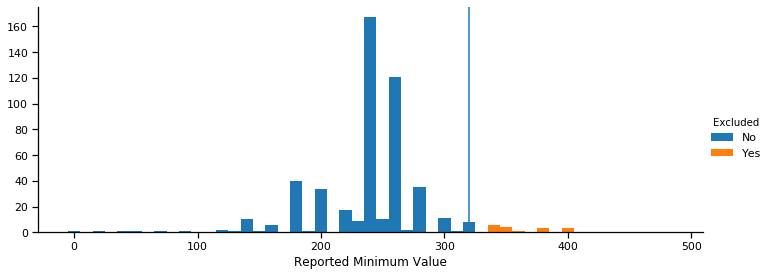

In [5]:
g = sns.FacetGrid(data=df, hue="excluded", height=4, aspect=2.5)
g.map(plt.hist, "memory_min", bins=np.arange(0, 500, 10), align="left")
g.add_legend(title="Excluded")
g.set_xlabels("Reported Minimum Value")
g.ax.axvline(320);

In [6]:
df_clean = df[df.excluded == "No"]
n_excluded = df.shape[0] - df_clean.shape[0]
Markdown(
    f"{n_excluded} participants excluded. Final number of observations after exclusion: {df_clean.shape[0]}"
)

21 participants excluded. Final number of observations after exclusion: 482

# Analysis

## Memory for the minimum price

The CDF of the responses shows the following:

* In the "Equal dispersion" condition, participants are unlikely to report a flight cheaper than the true minimum ($240).
* In the "Higher dispersion" condition, participants often underestimate the true minimum value.

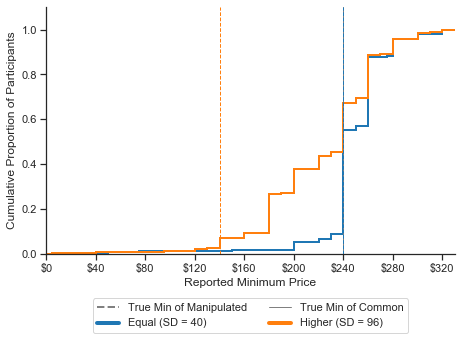

In [7]:
plot_minprice_cdf(df_clean, grayscale=True, save=True, show=False)
plot_minprice_cdf(df_clean, save=True, show=True)

We analyzed this difference using an OLS regression:

In [8]:
%%R -i df_clean -o coeffs

library(tidyverse)
df_clean$search_length <- df_clean$search_length %>% as.factor
df_clean$label_category <- df_clean$label_category %>% as.factor %>% relevel(ref="Florida")
df_clean$condition <- df_clean$condition %>% as.factor %>% relevel(ref="Equal dispersion")
contrasts(df_clean$label_category) <- contr.sum
summ <- summary(lm("memory_min ~ condition*label_category", df_clean))
coeffs <- summ$coefficients %>% as.data.frame

coeffs[["Standardized Betas"]] <- coeffs[["Estimate"]] / sd(df_clean$memory_min)

coeffs[["Predictor"]] <- c("Intercept",
                          "Non-Focal has higher dispersion", 
                          "Label of Focal (Sum-Contrast)", 
                          "Interaction Term")

In [9]:
coeffs.set_index("Predictor")

,Estimate,Std. Error,t value,Pr(>|t|),Standardized Betas
Predictor,,,,,
Intercept,247.850946,2.508677,98.797492,3.195617e-320,6.008930
Non-Focal has higher dispersion,-24.685543,3.607589,-6.842671,2.389741e-11,-0.598479
Label of Focal (Sum-Contrast),-0.405691,2.508677,-0.161715,8.715986e-01,-0.009836
Interaction Term,0.062322,3.607589,0.017275,9.862243e-01,0.001511


In [10]:
Markdown(
    f"As predicted, only the variance of the non-focal distribution exerts a significant \
influence: b = {coeffs.iloc[1, 0]:.3f}, p < .001. \n\nNeither the counterbalancing factor nor \
its interaction are significant at a .05 level."
)

As predicted, only the variance of the non-focal distribution exerts a significant influence: b = -24.686, p < .001. 

Neither the counterbalancing factor nor its interaction are significant at a .05 level.

In [11]:
nobs = df_clean.groupby("condition").below_true_min.count()
nsuc = df_clean.groupby("condition").below_true_min.sum()
props = nsuc / nobs * 100
chi, p = proportions_chisquare(nsuc[[0, 1]], nobs[[0, 1]])[0:2]
Markdown(
    f"""Proportion below actual min: {props[0]:.0f}% vs. {props[1]:.0f}%: $\chi$(1) = {chi:.2f}, {format_pvals(p)}; 
"""
)

Proportion below actual min: 9% vs. 45%: $\chi$(1) = 82.42, p < .001; 


## Number of offers searched

The second variable is the number of offers reviewed by participants.

As predicted, participants in the "More variance" condition reviewed more offers

The histogram below summarizes the number of offers reviewed by participants, as a function of their experimental condition. 

In [12]:
table = (
    df_clean.groupby(["condition", "search_length"])[["paid_price"]].count()
    / df_clean.groupby("condition")[["paid_price"]].count()
    * 100
)
table.index.names = ["Condition", "Offers Reviewed"]
table.columns = ["Proportion by condition"]
table.style.format("{:.2f}%")

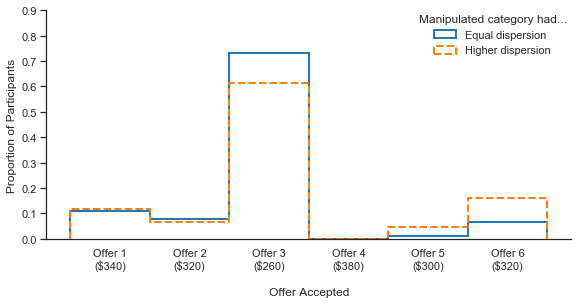

In [13]:
plot_search_length(df_clean, grayscale=True, save=True, show=False)
plot_search_length(df_clean, save=True, show=True)

In [14]:
df_clean["searched_too_long"] = (df_clean.search_length > 3) * 1
nobs = df_clean.groupby("condition").searched_too_long.count()
nsuc = df_clean.groupby("condition").searched_too_long.sum()
props = nsuc / nobs * 100
chi, p = proportions_chisquare(nsuc[[0, 1]], nobs[[0, 1]])[0:2]
Markdown(
    f"""Proportion of people who searched beyond the third offer: {props[0]:.0f}% vs. {props[1]:.0f}%: $\chi$(1) = {chi:.2f}, {format_pvals(p)}; 
"""
)

Proportion of people who searched beyond the third offer: 8% vs. 21%: $\chi$(1) = 15.99, p < .001; 


As reported in the pre-registration, we tested the significance of this difference using an Ordered Logit model. 

This approach models a latent utility space divided in K thresholds, delineating the preference between reviewing K and K+1 offers. 

This model estimates the impact of our predictors in the latent utility space: a positive coefficient means a preference for reviewing more offers.

Given that no participant accepted the fourth offer, the threshold between the third and fourth offer and the threshold between the fourth and fifth offer form a single threshold.

In [15]:
%%R -i df_clean -o coeffs
library(tidyverse)
library(MASS)
df_clean$search_length <- df_clean$search_length %>% as.factor
df_clean$label_category <- df_clean$label_category %>% as.factor %>% relevel(ref="Florida")
df_clean$condition <- df_clean$condition %>% as.factor %>% relevel(ref="Equal dispersion")
contrasts(df_clean$label_category) <- contr.sum

summ <- summary(polr("search_length ~ condition*label_category", df_clean, Hess=TRUE))

df_resid <- summ$df.residual
t_to_p <- function(t, df=1) {
    return(2*pt(-abs(t), df=df))
}

t_to_p_with_df <- partial(t_to_p, df=df_resid)

coeffs <- summ$coefficients %>% as.data.frame
coeffs[["Pr(>|t|)"]] <- coeffs[["t value"]] %>% purrr::map(t_to_p_with_df) %>% as.numeric
coeffs[["Odds Ratio"]] <-coeffs[["Value"]] %>% purrr::map(exp) %>% as.numeric
coeffs[4:6, "Odds Ratio"] <- c(NA, NA, NA)
coeffs[["Predictor"]] <- c("Other has Higher Variance (Dummy-Coded)", 
                          "Label of Focal (Sum-Contrast)", 
                          "Interaction Term", 
                          "Decision Threshold: Offer 1 to Offer 2",
                          "Decision Threshold: Offer 2 to Offer 3",
                          "Decision Threshold: Offer 3 to Offer 5",
                          "Decision Threshold: Offer 5 to Offer 6")

In [16]:
coeffs.set_index("Predictor")

,Value,Std. Error,t value,Pr(>|t|),Odds Ratio
Predictor,,,,,
Other has Higher Variance (Dummy-Coded),0.467835,0.193864,2.413207,1.619042e-02,1.596534
Label of Focal (Sum-Contrast),-0.027565,0.129259,-0.213253,8.312213e-01,0.972812
Interaction Term,-0.068774,0.191143,-0.359803,7.191546e-01,0.933538
Decision Threshold: Offer 1 to Offer 2,-1.876732,0.164060,-11.439295,6.232384e-27,NaN
Decision Threshold: Offer 2 to Offer 3,-1.291512,0.140925,-9.164556,1.501036e-18,NaN
Decision Threshold: Offer 3 to Offer 5,2.042973,0.167580,12.191018,6.208594e-30,NaN
Decision Threshold: Offer 5 to Offer 6,2.310382,0.179347,12.882195,8.872811e-33,10.078271


In [17]:
Markdown(
    f"As predicted, only the variance of the non-focal distribution had a significant \
influence: b = {coeffs.iloc[0, 0]:.3f}, p = {coeffs.iloc[0, 3]:.6f}, odds ratio = {coeffs.iloc[0, 4]:.3f}. \n\nNeither the counterbalancing factor nor \
its interaction are significant at a .05 level."
)

As predicted, only the variance of the non-focal distribution had a significant influence: b = 0.468, p = 0.016190, odds ratio = 1.597. 

Neither the counterbalancing factor nor its interaction are significant at a .05 level.

## Price Paid

In [18]:
%%R -i df_clean -o coeffs

library(tidyverse)
df_clean$label_category <- df_clean$label_category %>% as.factor %>% relevel(ref="Florida")
df_clean$condition <- df_clean$condition %>% as.factor %>% relevel(ref="Equal dispersion")
contrasts(df_clean$label_category) <- contr.sum

summ <- summary(lm("paid_price ~ condition*label_category", df_clean))
coeffs <- summ$coefficients %>% as.data.frame

coeffs[["Standardized Betas"]] <- coeffs[["Estimate"]] / sd(df_clean$paid_price)

coeffs[["Predictor"]] <- c("Intercept",
                          "Non-Focal has Higher Variance (Dummy-Coded)", 
                          "Label of Focal (Sum-Contrast)", 
                          "Interaction Term")

In [19]:
coeffs.set_index("Predictor")

,Estimate,Std. Error,t value,Pr(>|t|),Standardized Betas
Predictor,,,,,
Intercept,278.020154,1.984041,140.128212,0.000000,8.877996
Non-Focal has Higher Variance (Dummy-Coded),6.615588,2.853140,2.318704,0.020832,0.211255
Label of Focal (Sum-Contrast),-0.209935,1.984041,-0.105812,0.915776,-0.006704
Interaction Term,1.336905,2.853140,0.468573,0.639588,0.042691


In [20]:
Markdown(
    f"As predicted, only the variance of the non-focal distribution exerts a significant \
influence: b = {coeffs.iloc[1, 0]:.3f}, p < .001. \n\nNeither the counterbalancing factor nor \
its interaction are significant at a .05 level."
)

As predicted, only the variance of the non-focal distribution exerts a significant influence: b = 6.616, p < .001. 

Neither the counterbalancing factor nor its interaction are significant at a .05 level.